# **Multi Linear Reggression**

![Graph](https://media.geeksforgeeks.org/wp-content/uploads/20231123123151/ezgif-1-ba0c9540c5.gif)

### **Importing all the neccessry Libraries**

In [218]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    # Import Kraggle as we will use kraggle datasets
    import kagglehub
    from pathlib import Path
    import shutil
except:
    print("Module not found !")
    print("Installing Dependencies.....")
    !pip install numpy
    !pip install pandas
    !pip install matplotlib
    !pip install seaborn
    !pip install scikit-learn
    !pip install kagglehub[pandas-datasets]
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    # Import Kraggle as we will use kraggle datasets
    import kagglehub
    from pathlib import Path
    import shutil

### **Loading the dataset**

- **Download Dataset**

In [221]:
from pathlib import Path
dir = Path(__name__).parent.absolute()
parent_folder = Path(str(dir)+"/Datasets/Kraggle_Datasets")
subfolder_name = "1"

# Create the full path to the subfolder
subfolder_path = parent_folder / subfolder_name

# Check if it exists and is a directory
if subfolder_path.is_dir():
    pass
else:
    dir = Path(__name__).parent.absolute()
    target_path = str(dir) +'/Datasets/Kraggle_Datasets'
    # Download the dataset
    source_path = kagglehub.dataset_download("firozchowdury/placement-package-ctc-prediction-dataset")
    # Move (cut-paste) the dataset folder
    shutil.move(str(source_path), str(target_path))
    
    print("Dataset moved to:", target_path)

### **Reading the `.csv` file**

In [223]:
df = pd.read_csv(str(dir)+'/Datasets/Kraggle_Datasets/1/Placements_Dataset.csv')

In [224]:
df.head()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name of Student               220000 non-null  object 
 1   Roll No.                      220000 non-null  int64  
 2   No. of DSA questions          220000 non-null  int64  
 3   CGPA                          220000 non-null  float64
 4   Knows ML                      215581 non-null  object 
 5   Knows DSA                     220000 non-null  object 
 6   Knows Python                  215573 non-null  object 
 7   Knows JavaScript              215718 non-null  object 
 8   Knows HTML                    215671 non-null  object 
 9   Knows CSS                     215678 non-null  object 
 10  Knows Cricket                 220000 non-null  object 
 11  Knows Dance                   220000 non-null  object 
 12  Participated in College Fest  220000 non-nul

In [226]:
df.describe()

,Roll No.,No. of DSA questions,CGPA,No. of backlogs,Interview Room Temperature,Age of Candidate,Placement Package
count,220000.000000,220000.000000,220000.000000,220000.000000,220000.000000,220000.000000,220000.000000
mean,54857.740568,250.099414,5.005776,2.497368,24.004006,21.497373,20.295666
std,25983.468755,144.545550,2.888164,1.707581,3.467504,2.290835,15.597126
min,10000.000000,0.000000,0.000000,0.000000,18.000000,18.000000,2.500000
25%,32394.000000,125.000000,2.500000,1.000000,21.000000,19.000000,6.950000
50%,54695.000000,250.000000,5.020000,2.000000,24.000000,21.000000,12.530000
75%,77376.000000,375.000000,7.500000,4.000000,27.000000,23.000000,32.830000
max,99999.000000,500.000000,10.000000,5.000000,30.000000,25.000000,58.000000


### **Data Visualizee**

In [228]:
y = df["Placement Package"]
X = df.drop(["Name of Student", "Roll No.", "Knows Cricket", "Knows Dance", 
             "Participated in College Fest", "Was in Coding Club","Placement Package"], axis=1)


In [229]:
X

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,2,24.2,24,Computer Science
1,24,1.23,Yes,No,No,Yes,No,No,1,20.5,18,Computer Science
2,333,9.85,No,Yes,Yes,No,Yes,No,1,21.6,25,Mechanical Engineering
3,132,1.96,No,No,Yes,No,Yes,No,4,21.2,20,Computer Science
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,1,20.7,21,Electrical Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...
219995,453,8.77,No,Yes,No,Yes,No,Yes,5,28.4,24,Electrical Engineering
219996,375,6.15,No,No,Yes,Yes,No,No,3,27.6,18,Electrical Engineering
219997,52,2.05,No,No,No,No,Yes,No,4,27.2,25,Computer Science
219998,404,5.63,No,No,Yes,Yes,No,Yes,0,25.0,21,Mechanical Engineering


In [230]:
y

0         20.01
1         10.97
2          7.51
3          4.96
4         46.30
          ...  
219995    24.81
219996    11.00
219997     3.82
219998    47.80
219999    23.08
Name: Placement Package, Length: 220000, dtype: float64

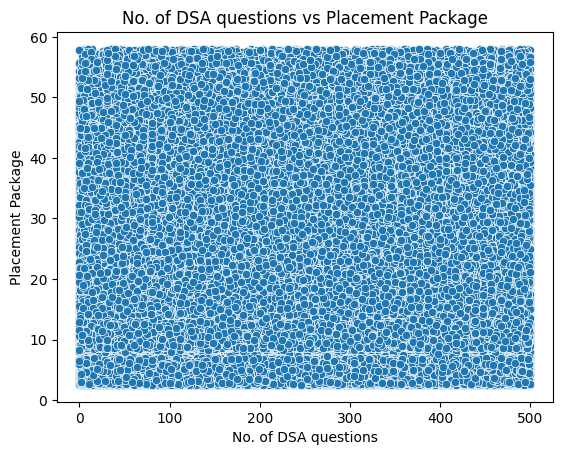

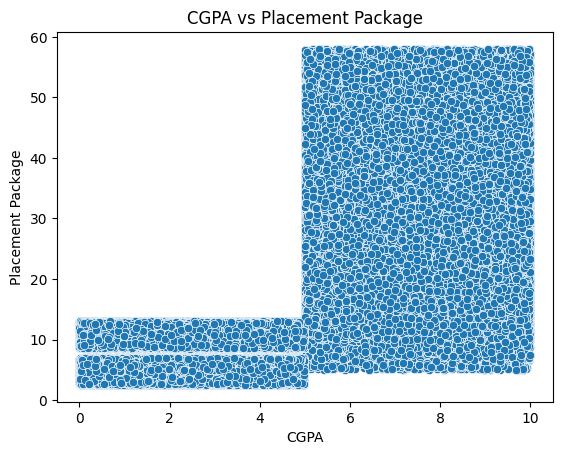

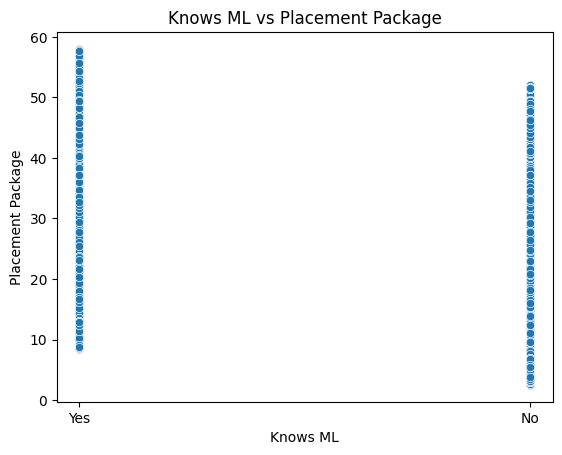

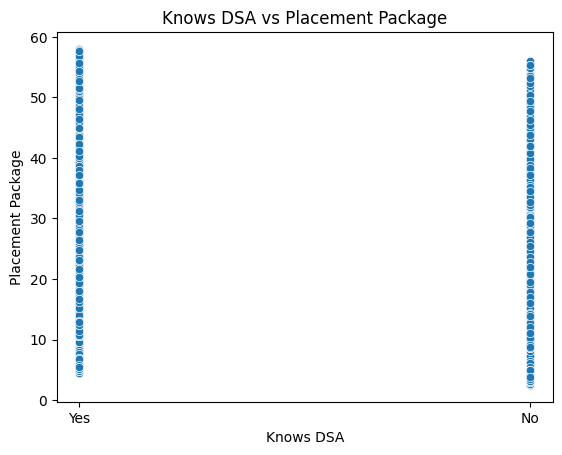

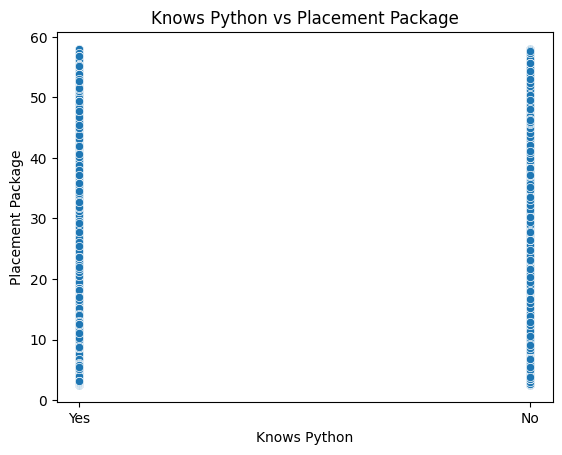

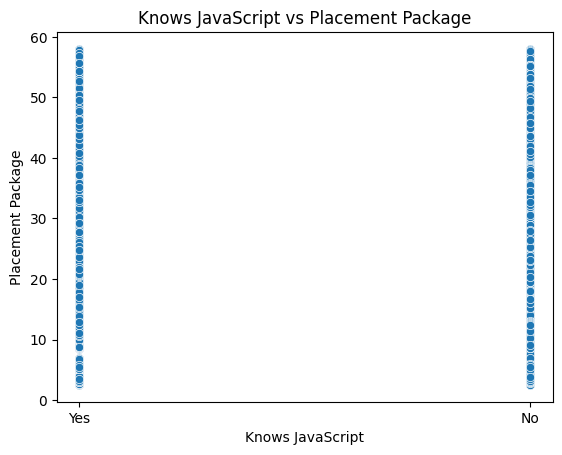

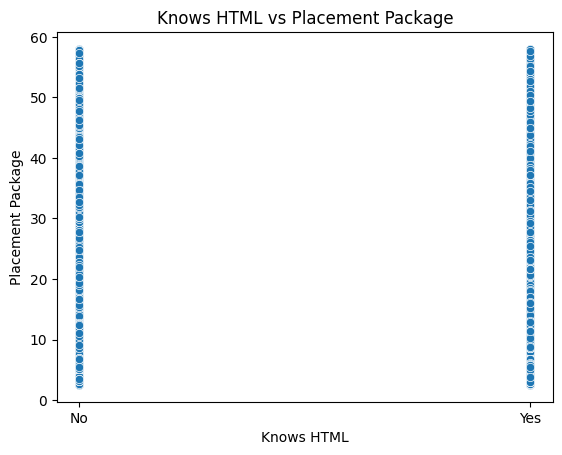

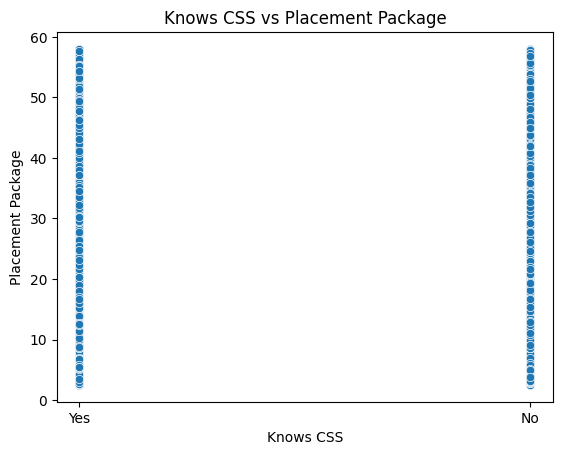

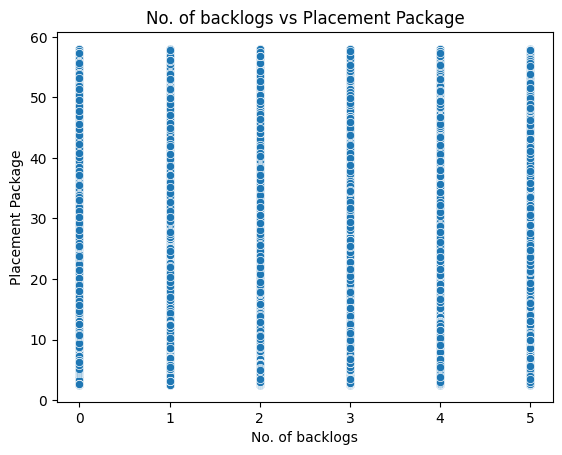

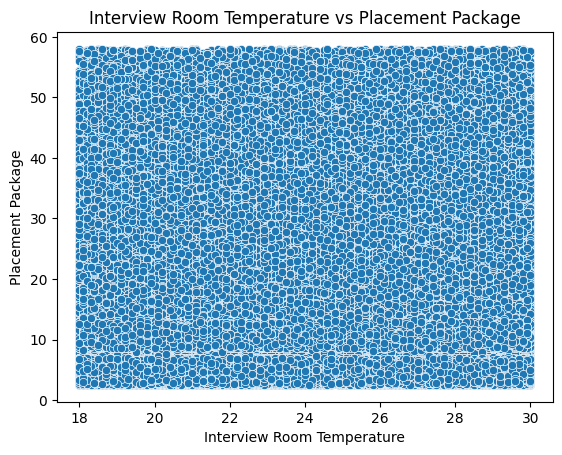

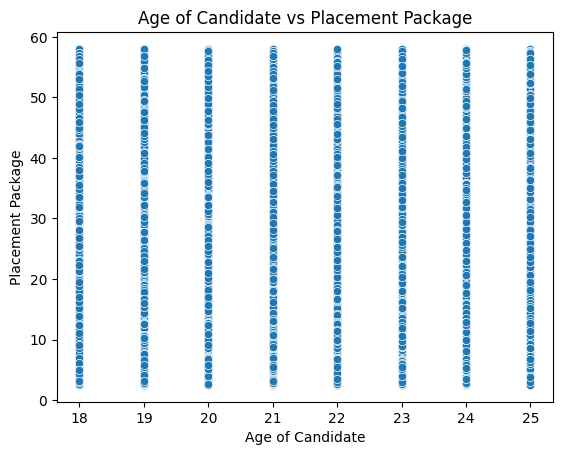

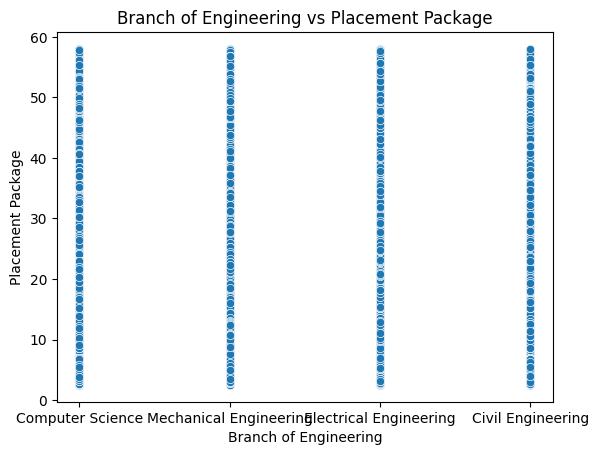

In [231]:
features = X.columns
target = 'Placement Package'

for feature in features:
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.show()

### **Data Preproccessing**

In [233]:
df = df.dropna()

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199057 entries, 0 to 219999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name of Student               199057 non-null  object 
 1   Roll No.                      199057 non-null  int64  
 2   No. of DSA questions          199057 non-null  int64  
 3   CGPA                          199057 non-null  float64
 4   Knows ML                      199057 non-null  object 
 5   Knows DSA                     199057 non-null  object 
 6   Knows Python                  199057 non-null  object 
 7   Knows JavaScript              199057 non-null  object 
 8   Knows HTML                    199057 non-null  object 
 9   Knows CSS                     199057 non-null  object 
 10  Knows Cricket                 199057 non-null  object 
 11  Knows Dance                   199057 non-null  object 
 12  Participated in College Fest  199057 non-null  ob

In [261]:
y = df["Placement Package"]
X = df.drop(["Name of Student", "Roll No.", "Knows Cricket", "Knows Dance", 
             "Participated in College Fest", "Was in Coding Club","Placement Package"], axis=1)

In [269]:
X.head()

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,2,24.2,24,Computer Science
1,24,1.23,Yes,No,No,Yes,No,No,1,20.5,18,Computer Science
2,333,9.85,No,Yes,Yes,No,Yes,No,1,21.6,25,Mechanical Engineering
3,132,1.96,No,No,Yes,No,Yes,No,4,21.2,20,Computer Science
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,1,20.7,21,Electrical Engineering


In [267]:
X.shape

(199057, 12)

In [273]:
y.head()

0    20.01
1    10.97
2     7.51
3     4.96
4    46.30
Name: Placement Package, dtype: float64

In [265]:
y.shape

(199057,)

- **Now in my of the columns data are being written in String but I want all Column values in neumeric that I can feed it into model**   